#### Getting data 

In [396]:
import pandas as pd 

df = pd.read_csv('Master_H1b.csv', encoding='latin-1')


df.to_csv('Master_H1b_clean.csv', index=False)

In [397]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [398]:
df = pd.read_csv('Master_H1b_clean.csv')

In [399]:
df.head()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210.0,1,Y,59197.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210.0,1,Y,49800.0,Year,Other,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,ANALYSTS,541511.0,2,Y,76502.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541511.0,1,Y,90376.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
4,22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,ANALYSTS,522110.0,1,Y,116605.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,CERTIFIEDWITHDRAWN


In [400]:
df['SOC_NAME']

0                            ANALYSTS
1                            ANALYSTS
2                            ANALYSTS
3                 COMPUTER OCCUPATION
4                            ANALYSTS
                     ...             
528129                      SURVEYORS
528130                      EDUCATION
528131    WRITERS EDITORS AND AUTHORS
528132    WRITERS EDITORS AND AUTHORS
528133    WRITERS EDITORS AND AUTHORS
Name: SOC_NAME, Length: 528134, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528134 entries, 0 to 528133
Data columns (total 27 columns):
CASE_SUBMITTED_DAY       528134 non-null int64
CASE_SUBMITTED_MONTH     528134 non-null int64
CASE_SUBMITTED_YEAR      528134 non-null int64
DECISION_DAY             528134 non-null int64
DECISION_MONTH           528134 non-null int64
DECISION_YEAR            528134 non-null int64
VISA_CLASS               528134 non-null object
EMPLOYER_NAME            528095 non-null object
EMPLOYER_STATE           528124 non-null object
EMPLOYER_COUNTRY         528134 non-null object
SOC_NAME                 528134 non-null object
NAICS_CODE               528132 non-null float64
TOTAL_WORKERS            528134 non-null int64
FULL_TIME_POSITION       528131 non-null object
PREVAILING_WAGE          528134 non-null float64
PW_UNIT_OF_PAY           528101 non-null object
PW_SOURCE                528101 non-null object
PW_SOURCE_YEAR           528103 non-null float64
PW_SOURCE_OTHER          5281

In [11]:
df['CASE_STATUS'].value_counts()

CERTIFIED             468969
CERTIFIEDWITHDRAWN     36170
WITHDRAWN              16012
DENIED                  6983
Name: CASE_STATUS, dtype: int64

In [12]:
df['EMPLOYER_COUNTRY'].value_counts()

UNITED STATES OF AMERICA    528124
CANADA                           7
AUSTRALIA                        2
CHINA                            1
Name: EMPLOYER_COUNTRY, dtype: int64

In [13]:
df['DECISION_YEAR'].value_counts()

2017    436173
2016     91961
Name: DECISION_YEAR, dtype: int64

### Moving data into SQL database

In [14]:
from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [15]:
params = {
    'host': '13.58.184.120',
    'user': 'ubuntu',
    'port': 5432
}

#Connect and create database, disconnect, and reconnect to the right database
connection = connect(**params, dbname='ubuntu')
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
#connection.cursor().execute('CREATE DATABASE h1b_2018;')
connection.close()

In [16]:
from sqlalchemy import create_engine
connection_string = f'postgres://ubuntu:{params["host"]}@{params["host"]}:{params["port"]}/h1b_2018'
engine = create_engine(connection_string, echo=True)
#df3.to_sql('h1b_2018', engine, index=False)




schema made by pandas

```sql
CREATE TABLE IF NOT EXISTS h1b_table (
	"CASE_SUBMITTED_DAY" BIGINT, 
	"CASE_SUBMITTED_MONTH" BIGINT, 
	"CASE_SUBMITTED_YEAR" BIGINT, 
	"DECISION_DAY" BIGINT, 
	"DECISION_MONTH" BIGINT, 
	"DECISION_YEAR" BIGINT, 
	"VISA_CLASS" TEXT, 
	"EMPLOYER_NAME" TEXT, 
	"EMPLOYER_STATE" TEXT, 
	"EMPLOYER_COUNTRY" TEXT, 
	"SOC_NAME" TEXT, 
	"NAICS_CODE" FLOAT(53), 
	"TOTAL_WORKERS" BIGINT, 
	"FULL_TIME_POSITION" TEXT, 
	"PREVAILING_WAGE" FLOAT(53), 
	"PW_UNIT_OF_PAY" TEXT, 
	"PW_SOURCE" TEXT, 
	"PW_SOURCE_YEAR" FLOAT(53), 
	"PW_SOURCE_OTHER" TEXT, 
	"WAGE_RATE_OF_PAY_FROM" FLOAT(53), 
	"WAGE_RATE_OF_PAY_TO" FLOAT(53), 
	"WAGE_UNIT_OF_PAY" TEXT, 
	"H-1B_DEPENDENT" TEXT, 
	"WILLFUL_VIOLATOR" TEXT, 
	"WORKSITE_STATE" TEXT, 
	"WORKSITE_POSTAL_CODE" TEXT, 
	"CASE_STATUS" TEXT
);
```


copy command
```
copy h1b_table from '/home/ubuntu/Master_H1b.csv' DELIMITER ',' CSV HEADER;
```

In [17]:
connection = connect(**params, dbname='h1b_master')
cursor = connection.cursor()
cursor.execute("""SELECT "DECISION_DAY" FROM h1b_table LIMIT 20;""")
cursor.fetchall()

[(21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,),
 (21,)]

### Cleaning data 

In [401]:
df1 = df.dropna()

In [402]:
df1.CASE_STATUS.value_counts()

CERTIFIED             460175
CERTIFIEDWITHDRAWN     35580
WITHDRAWN              15701
DENIED                  6289
Name: CASE_STATUS, dtype: int64

In [403]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517745 entries, 0 to 528132
Data columns (total 27 columns):
CASE_SUBMITTED_DAY       517745 non-null int64
CASE_SUBMITTED_MONTH     517745 non-null int64
CASE_SUBMITTED_YEAR      517745 non-null int64
DECISION_DAY             517745 non-null int64
DECISION_MONTH           517745 non-null int64
DECISION_YEAR            517745 non-null int64
VISA_CLASS               517745 non-null object
EMPLOYER_NAME            517745 non-null object
EMPLOYER_STATE           517745 non-null object
EMPLOYER_COUNTRY         517745 non-null object
SOC_NAME                 517745 non-null object
NAICS_CODE               517745 non-null float64
TOTAL_WORKERS            517745 non-null int64
FULL_TIME_POSITION       517745 non-null object
PREVAILING_WAGE          517745 non-null float64
PW_UNIT_OF_PAY           517745 non-null object
PW_SOURCE                517745 non-null object
PW_SOURCE_YEAR           517745 non-null float64
PW_SOURCE_OTHER          5177

In [21]:
df1.PREVAILING_WAGE[0:10]

0     59197.0
1     49800.0
2     76502.0
3     90376.0
4    116605.0
5     59405.0
6     52915.0
7     51730.0
8     58053.0
9     46821.0
Name: PREVAILING_WAGE, dtype: float64

- imports

#### EDA 

- case status
- EMPLOYER_COUNTRY
- top demand 
- top companies 
- the map of hires 

#### Modeling 
- include only two case statuses: denied, accpeted
- create categories of wage 
- feature engineering 
- decision tree classifier
- logistic regression model 
- random forest 
- naive bayes 

In [22]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [23]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [24]:
import plotly.graph_objs as go

In [25]:
import cufflinks as cf

In [26]:
df1.CASE_STATUS.value_counts()

CERTIFIED             460175
CERTIFIEDWITHDRAWN     35580
WITHDRAWN              15701
DENIED                  6289
Name: CASE_STATUS, dtype: int64

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517745 entries, 0 to 528132
Data columns (total 27 columns):
CASE_SUBMITTED_DAY       517745 non-null int64
CASE_SUBMITTED_MONTH     517745 non-null int64
CASE_SUBMITTED_YEAR      517745 non-null int64
DECISION_DAY             517745 non-null int64
DECISION_MONTH           517745 non-null int64
DECISION_YEAR            517745 non-null int64
VISA_CLASS               517745 non-null object
EMPLOYER_NAME            517745 non-null object
EMPLOYER_STATE           517745 non-null object
EMPLOYER_COUNTRY         517745 non-null object
SOC_NAME                 517745 non-null object
NAICS_CODE               517745 non-null float64
TOTAL_WORKERS            517745 non-null int64
FULL_TIME_POSITION       517745 non-null object
PREVAILING_WAGE          517745 non-null float64
PW_UNIT_OF_PAY           517745 non-null object
PW_SOURCE                517745 non-null object
PW_SOURCE_YEAR           517745 non-null float64
PW_SOURCE_OTHER          5177

In [28]:
df1['CASE_STATUS'].value_counts()

CERTIFIED             460175
CERTIFIEDWITHDRAWN     35580
WITHDRAWN              15701
DENIED                  6289
Name: CASE_STATUS, dtype: int64

In [29]:
from IPython.display import IFrame

In [404]:
df2_cases = df1[(df1['CASE_STATUS'] != 'WITHDRAWN') & (df1['CASE_STATUS'] != 'CERTIFIEDWITHDRAWN')]

In [405]:
df2_cases['DECISION_YEAR'].value_counts()

2017    390460
2016     76004
Name: DECISION_YEAR, dtype: int64

In [406]:
df2_cases['CASE_STATUS'].value_counts()

CERTIFIED    460175
DENIED         6289
Name: CASE_STATUS, dtype: int64

In [407]:
df2_cases['VISA_CLASS'].value_counts()

H1B               466021
E3 Australian        336
H1B1 Chile            55
H1B1 Singapore        52
Name: VISA_CLASS, dtype: int64

In [408]:
df2_cases = df2_cases[(df2_cases['VISA_CLASS'] != 'E3 Australian') & (df2_cases['VISA_CLASS'] !='H1B1 Chile') &(df2_cases['VISA_CLASS'] !='H1B1 Singapore')]

In [409]:
df2_cases = df2_cases[(df2_cases['PW_UNIT_OF_PAY'] != 'Hour') & (df2_cases['PW_UNIT_OF_PAY'] != 'Month') & (df2_cases['PW_UNIT_OF_PAY'] != 'Week') & (df2_cases['PW_UNIT_OF_PAY'] != 'PW_UNIT_OF_PAY')]





In [410]:
df2_cases['EMPLOYER_COUNTRY'].value_counts()

UNITED STATES OF AMERICA    436844
Name: EMPLOYER_COUNTRY, dtype: int64

In [411]:
df2_cases['FULL_TIME_POSITION'].value_counts()

Y    436834
N        10
Name: FULL_TIME_POSITION, dtype: int64

In [412]:
df2_cases.drop(['EMPLOYER_COUNTRY','PW_UNIT_OF_PAY','PW_SOURCE_YEAR','PW_SOURCE_OTHER','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','WORKSITE_POSTAL_CODE','WORKSITE_STATE'],axis=1,inplace=True)

In [413]:
df2_cases.drop(['NAICS_CODE'],axis=1,inplace=True)

In [414]:
df2_cases.drop(['PW_SOURCE'],axis=1,inplace=True)

### Feature Engineering 

In [415]:
df2_cases.head()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_NAME,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,H-1B_DEPENDENT,WILLFUL_VIOLATOR,CASE_STATUS
109,27,9,2016,3,10,2016,H1B,INITECH GLOBAL LLC,MO,ANALYSTS,1,Y,67870.0,Y,N,CERTIFIED
186,27,9,2016,3,10,2016,H1B,3 D MICROMAC AMERICA LLC,CA,ANALYSTS,1,Y,121430.0,N,N,CERTIFIED
187,27,9,2016,3,10,2016,H1B,4 SERV SOLUTIONS INC,MI,ANALYSTS,1,Y,54704.0,Y,N,CERTIFIED
188,27,9,2016,3,10,2016,H1B,8K MILES SOFTWARE SERVICES INC,CA,ANALYSTS,1,Y,56701.0,Y,N,CERTIFIED
189,27,9,2016,3,10,2016,H1B,A1 KAISER INC,NJ,ANALYSTS,1,Y,78208.0,Y,N,CERTIFIED


In [416]:
df2_cases = pd.get_dummies(df2_cases, columns=['FULL_TIME_POSITION'])

In [417]:
df2_cases = pd.get_dummies(df2_cases, columns = ['H-1B_DEPENDENT'])

In [418]:
df2_cases = pd.get_dummies(df2_cases, columns = ['WILLFUL_VIOLATOR'])

In [419]:
df2_cases['CASE_STATUS'].value_counts()

CERTIFIED    431734
DENIED         5110
Name: CASE_STATUS, dtype: int64

In [420]:
df2_cases['CASE_STATUS'] = df2_cases['CASE_STATUS'].replace('CERTIFIED',0)

In [421]:
df2_cases['CASE_STATUS'] = df2_cases['CASE_STATUS'].replace('DENIED',1)

In [422]:
df2_cases['CASE_STATUS'].value_counts()

0    431734
1      5110
Name: CASE_STATUS, dtype: int64

In [423]:
df2_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436844 entries, 109 to 528112
Data columns (total 19 columns):
CASE_SUBMITTED_DAY      436844 non-null int64
CASE_SUBMITTED_MONTH    436844 non-null int64
CASE_SUBMITTED_YEAR     436844 non-null int64
DECISION_DAY            436844 non-null int64
DECISION_MONTH          436844 non-null int64
DECISION_YEAR           436844 non-null int64
VISA_CLASS              436844 non-null object
EMPLOYER_NAME           436844 non-null object
EMPLOYER_STATE          436844 non-null object
SOC_NAME                436844 non-null object
TOTAL_WORKERS           436844 non-null int64
PREVAILING_WAGE         436844 non-null float64
CASE_STATUS             436844 non-null int64
FULL_TIME_POSITION_N    436844 non-null uint8
FULL_TIME_POSITION_Y    436844 non-null uint8
H-1B_DEPENDENT_N        436844 non-null uint8
H-1B_DEPENDENT_Y        436844 non-null uint8
WILLFUL_VIOLATOR_N      436844 non-null uint8
WILLFUL_VIOLATOR_Y      436844 non-null uint8
dtypes:

In [424]:
df2_cases[df2_cases['FULL_TIME_POSITION_N'] ==1]

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_NAME,TOTAL_WORKERS,PREVAILING_WAGE,CASE_STATUS,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,H-1B_DEPENDENT_N,H-1B_DEPENDENT_Y,WILLFUL_VIOLATOR_N,WILLFUL_VIOLATOR_Y
46363,11,11,2016,16,11,2016,H1B,LINKEDIN CORPORATION,CA,MARKETING,1,135387.0,1,1,0,1,0,1,0
51454,15,11,2016,21,11,2016,H1B,TW2M DESIGN/BUILD LLC,NY,FINANCE,1,38584.0,1,1,0,1,0,1,0
57454,23,11,2016,28,11,2016,H1B,NORTHERN VIRGINIA FAMILY SERVICE,VA,SCIENTIST,1,30306.0,1,1,0,1,0,1,0
187002,22,2,2017,24,2,2017,H1B,TAI CHI ACUPUNCTURE and WELLNESS CENTER LLC,MA,REAL ESTATE,1,52208.0,1,1,0,1,0,1,0
231573,2,3,2017,8,3,2017,H1B,SOUTHERN OREGON CARDIOLOGY LLC,OR,ENGINEERS,1,103501.0,1,1,0,1,0,1,0
332643,19,3,2017,21,3,2017,H1B,PROSOFT IT SERVICES INC,NY,COUNSELORS,1,50294.0,1,1,0,0,1,1,0
417799,29,3,2017,4,4,2017,H1B,BLUE PRINT INFORMATION STRATEGIES LLC,NJ,COMPUTER OCCUPATION,1,52915.0,1,1,0,1,0,1,0
463983,2,5,2017,8,5,2017,H1B,NESS USA INC,PA,COMPUTER OCCUPATION,3,83304.0,1,1,0,0,1,1,0
486434,19,5,2017,25,5,2017,H1B,THE VERITAS HEALTHCARE SOLUTIONS LLC,NJ,DOCTORS,1,52478.0,1,1,0,0,1,1,0
526608,29,6,2017,29,6,2017,H1B,LARSEN and TOUBRO INFOTECH LIMITED,NJ,MATHEMATICIANS AND STATISTICIANS,1,71781.0,1,1,0,0,1,1,0


In [425]:
df2_cases.drop(['VISA_CLASS','DECISION_YEAR','DECISION_MONTH','DECISION_DAY'],axis=1,inplace=True)

In [426]:
df2_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436844 entries, 109 to 528112
Data columns (total 15 columns):
CASE_SUBMITTED_DAY      436844 non-null int64
CASE_SUBMITTED_MONTH    436844 non-null int64
CASE_SUBMITTED_YEAR     436844 non-null int64
EMPLOYER_NAME           436844 non-null object
EMPLOYER_STATE          436844 non-null object
SOC_NAME                436844 non-null object
TOTAL_WORKERS           436844 non-null int64
PREVAILING_WAGE         436844 non-null float64
CASE_STATUS             436844 non-null int64
FULL_TIME_POSITION_N    436844 non-null uint8
FULL_TIME_POSITION_Y    436844 non-null uint8
H-1B_DEPENDENT_N        436844 non-null uint8
H-1B_DEPENDENT_Y        436844 non-null uint8
WILLFUL_VIOLATOR_N      436844 non-null uint8
WILLFUL_VIOLATOR_Y      436844 non-null uint8
dtypes: float64(1), int64(5), object(3), uint8(6)
memory usage: 35.8+ MB


Dummy variables 
- H-1B_DEPENDENT
- EMPLOYER_STATE (only for Logistic Regression)
- FULL_TIME_POSITION	

In [52]:
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns

### Top 10 H -1B Sponsors

In [574]:
from bokeh.plotting import figure, show
from bokeh.embed import components
from bokeh.models import CategoricalColorMapper, HoverTool
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [587]:
simpleScatterPlot = figure(plot_width=600, plot_height=600)

simpleScatterPlot.circle('PREVAILING_WAGE'],df2_cases2['CASE_SUBMITTED_MONTH'], size=10, color='firebrick', alpha=0.7)

GlyphRenderer(id='1103', ...)

In [567]:
employer_name = df2_cases2['EMPLOYER_NAME'].value_counts().index.tolist()
employer_petitions = df2_cases2['EMPLOYER_NAME'].value_counts().tolist()
employer_petitions
df_employer = df2_cases2['EMPLOYER_NAME'].value_counts().to_frame().head(20)
df_employer = df_employer.reset_index()
df_employer.columns = ['EMPLOYER_NAME','COUNT_H1B']

In [568]:
s = df_employer.set_index('EMPLOYER_NAME')['COUNT_H1B']
s = s.reset_index()

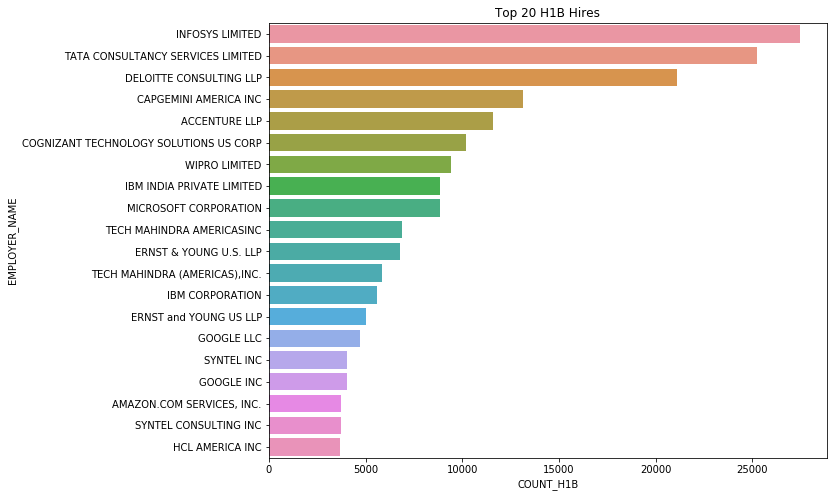

In [569]:
plt.figure(figsize=(10,8))
sns.barplot(x='COUNT_H1B',y='EMPLOYER_NAME',data=s)
plt.title('Top 20 H1B Hires');


In [57]:
df2_cases['SOC_NAME'].value_counts()

COMPUTER OCCUPATION                  222613
ANALYSTS                              74538
ENGINEERS                             41190
FINANCE                               12000
DOCTORS                               11390
EDUCATION                             10942
MARKETING                              8922
SCIENTIST                              8254
ACCOUNTANTS                            6801
IT MANAGERS                            5607
MANAGERS                               4613
MATHEMATICIANS AND STATISTICIANS       4253
HUMAN RESOURCES                        2821
ARCHITECTURE                           2141
LAWYERS AND LEGAL SUPPORT WORKERS      1929
LAB TECHNICIANS                        1862
DESIGNERS                              1856
GRAPHIC DESIGNERS                      1778
LOGISTICIANS                           1569
INTERNIST                              1393
HEALTHCARE                             1116
BUSINESS OPERATIONS SPECIALIST          873
ECONOMISTS                      

In [58]:
### NAICS code for data science 541512

In [570]:
data_sci = df2_cases2[df2_cases2['SOC_NAME'] == 'ANALYSTS']

In [571]:
employer = data_sci['EMPLOYER_NAME'].value_counts()
employer = employer.reset_index()
employer.columns = ['EMPLOYER_NAME','COUNT_H1B']

In [572]:
employer = employer.head(20)

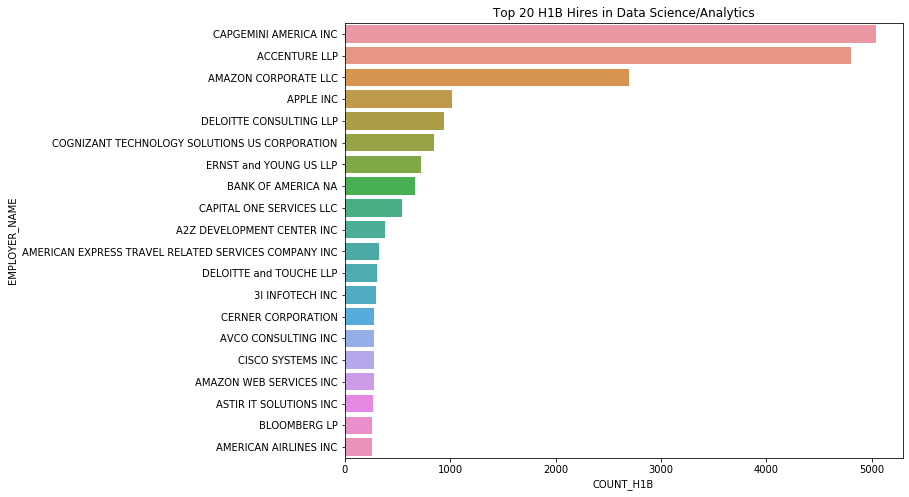

In [573]:
plt.figure(figsize=(10,8))
sns.barplot(x='COUNT_H1B',y='EMPLOYER_NAME',data=employer)
plt.title('Top 20 H1B Hires in Data Science/Analytics');


unfortunately data science is new position and UCSIS did not figure out separate encoding for this position. 

### Logistic regression 

In [63]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets, model_selection
from sklearn import linear_model, metrics
from sklearn import preprocessing, pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC, SVC

Using TensorFlow backend.
/anaconda3/envs/Metis/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7



In [64]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Final Data

In [427]:
df2_cases.rename(columns ={'FULL_TIME_POSITION_Y':'FULL_TIME_POSITION_Y(1)_N(0)','H-1B_DEPENDENT_Y':'H-1B_DEPENDENT_Y(1)_N(0)','WILLFUL_VIOLATOR_Y':'WILLFUL_VIOLATOR_Y(1)_N(0)'},inplace=True)

In [428]:
df2_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436844 entries, 109 to 528112
Data columns (total 15 columns):
CASE_SUBMITTED_DAY              436844 non-null int64
CASE_SUBMITTED_MONTH            436844 non-null int64
CASE_SUBMITTED_YEAR             436844 non-null int64
EMPLOYER_NAME                   436844 non-null object
EMPLOYER_STATE                  436844 non-null object
SOC_NAME                        436844 non-null object
TOTAL_WORKERS                   436844 non-null int64
PREVAILING_WAGE                 436844 non-null float64
CASE_STATUS                     436844 non-null int64
FULL_TIME_POSITION_N            436844 non-null uint8
FULL_TIME_POSITION_Y(1)_N(0)    436844 non-null uint8
H-1B_DEPENDENT_N                436844 non-null uint8
H-1B_DEPENDENT_Y(1)_N(0)        436844 non-null uint8
WILLFUL_VIOLATOR_N              436844 non-null uint8
WILLFUL_VIOLATOR_Y(1)_N(0)      436844 non-null uint8
dtypes: float64(1), int64(5), object(3), uint8(6)
memory usage: 35.8+ MB

In [429]:
df2_cases.drop(['FULL_TIME_POSITION_N','H-1B_DEPENDENT_N','WILLFUL_VIOLATOR_N'],axis=1,inplace=True)

In [430]:
df2_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436844 entries, 109 to 528112
Data columns (total 12 columns):
CASE_SUBMITTED_DAY              436844 non-null int64
CASE_SUBMITTED_MONTH            436844 non-null int64
CASE_SUBMITTED_YEAR             436844 non-null int64
EMPLOYER_NAME                   436844 non-null object
EMPLOYER_STATE                  436844 non-null object
SOC_NAME                        436844 non-null object
TOTAL_WORKERS                   436844 non-null int64
PREVAILING_WAGE                 436844 non-null float64
CASE_STATUS                     436844 non-null int64
FULL_TIME_POSITION_Y(1)_N(0)    436844 non-null uint8
H-1B_DEPENDENT_Y(1)_N(0)        436844 non-null uint8
WILLFUL_VIOLATOR_Y(1)_N(0)      436844 non-null uint8
dtypes: float64(1), int64(5), object(3), uint8(3)
memory usage: 34.6+ MB


In [207]:
## connect to another dataframe

In [431]:
df_second = pd.read_csv('secondDFF.csv')

In [432]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535317 entries, 0 to 535316
Data columns (total 12 columns):
CASE_STATUS                     535317 non-null object
EMPLOYER_NAME                   535303 non-null object
EMPLOYER_STATE                  535282 non-null object
SOC_NAME                        535315 non-null object
TOTAL_WORKERS                   535317 non-null int64
FULL_TIME_POSITION_Y(1)_N(0)    535313 non-null object
PREVAILING_WAGE                 535316 non-null float64
H-1B_DEPENDENT_Y(1)_N(0)        535310 non-null object
WILLFUL_VIOLATOR_Y(1)_N(0)      535309 non-null object
CASE_SUBMITTED_YEAR             535317 non-null int64
CASE_SUBMITTED_DAY              535317 non-null int64
CASE_SUBMITTED_MONTH            535317 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 49.0+ MB


In [433]:
df2_cases2 = pd.concat([df2_cases,df_second],axis=0,sort=True)

In [434]:
df2_cases2['FULL_TIME_POSITION_Y(1)_N(0)'] = df2_cases2['FULL_TIME_POSITION_Y(1)_N(0)'].replace('N',0)

In [436]:
df2_cases2['FULL_TIME_POSITION_Y(1)_N(0)'] = df2_cases2['FULL_TIME_POSITION_Y(1)_N(0)'].replace('Y',1)

In [437]:
df2_cases2['H-1B_DEPENDENT_Y(1)_N(0)'] = df2_cases2['H-1B_DEPENDENT_Y(1)_N(0)'].replace('N',0)

In [438]:
df2_cases2['H-1B_DEPENDENT_Y(1)_N(0)'] = df2_cases2['H-1B_DEPENDENT_Y(1)_N(0)'].replace('Y',1)

In [439]:
df2_cases2['WILLFUL_VIOLATOR_Y(1)_N(0)'] = df2_cases2['WILLFUL_VIOLATOR_Y(1)_N(0)'].replace('Y',1)

In [440]:
df2_cases2['WILLFUL_VIOLATOR_Y(1)_N(0)'] = df2_cases2['WILLFUL_VIOLATOR_Y(1)_N(0)'].replace('N',0)

In [441]:
df2_cases2['CASE_STATUS'] = df2_cases2['CASE_STATUS'].replace('CERTIFIED',0)
df2_cases2['CASE_STATUS'] = df2_cases2['CASE_STATUS'].replace('DENIED',1)


In [442]:
df2_cases = df2_cases.dropna()

In [443]:
df2_cases[-30:-1]

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,EMPLOYER_NAME,EMPLOYER_STATE,SOC_NAME,TOTAL_WORKERS,PREVAILING_WAGE,CASE_STATUS,FULL_TIME_POSITION_Y(1)_N(0),H-1B_DEPENDENT_Y(1)_N(0),WILLFUL_VIOLATOR_Y(1)_N(0)
528066,26,6,2017,WORKSOFT,TX,SCIENTIST,1,60798.0,0,1,0,0
528067,26,6,2017,WORLD RESOURCES INSTITUTE,DC,SCIENTIST,1,42120.0,0,1,0,0
528069,26,6,2017,XAVIENT INFORMATION SYSTEMS INC,CA,SCIENTIST,1,80995.0,0,1,1,0
528070,26,6,2017,XCHANGING SOLUTIONS USA INC,VA,SCIENTIST,10,66373.0,0,1,0,0
528071,26,6,2017,XP POWER LLC,CA,SCIENTIST,1,124675.0,0,1,0,0
528072,26,6,2017,XTREAM IT PEOPLE INC,NY,SCIENTIST,1,94619.0,0,1,1,0
528073,26,6,2017,YAHOO HOLDINGS INC,CA,SCIENTIST,1,147357.0,0,1,0,0
528074,26,6,2017,YAHOO HOLDINGS INC,CA,SCIENTIST,1,60570.0,0,1,0,0
528075,26,6,2017,YAHOO HOLDINGS INC,CA,SCIENTIST,1,60570.0,0,1,1,0
528076,26,6,2017,YAHOO HOLDINGS INC,CA,SCIENTIST,1,134971.0,0,1,1,0


In [444]:
df2_cases[['CASE_STATUS','FULL_TIME_POSITION_Y(1)_N(0)','H-1B_DEPENDENT_Y(1)_N(0)','WILLFUL_VIOLATOR_Y(1)_N(0)']]=df2_cases[['CASE_STATUS','FULL_TIME_POSITION_Y(1)_N(0)','H-1B_DEPENDENT_Y(1)_N(0)','WILLFUL_VIOLATOR_Y(1)_N(0)']].astype(np.uint8)

In [445]:
df2_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436844 entries, 109 to 528112
Data columns (total 12 columns):
CASE_SUBMITTED_DAY              436844 non-null int64
CASE_SUBMITTED_MONTH            436844 non-null int64
CASE_SUBMITTED_YEAR             436844 non-null int64
EMPLOYER_NAME                   436844 non-null object
EMPLOYER_STATE                  436844 non-null object
SOC_NAME                        436844 non-null object
TOTAL_WORKERS                   436844 non-null int64
PREVAILING_WAGE                 436844 non-null float64
CASE_STATUS                     436844 non-null uint8
FULL_TIME_POSITION_Y(1)_N(0)    436844 non-null uint8
H-1B_DEPENDENT_Y(1)_N(0)        436844 non-null uint8
WILLFUL_VIOLATOR_Y(1)_N(0)      436844 non-null uint8
dtypes: float64(1), int64(4), object(3), uint8(4)
memory usage: 31.7+ MB


### Original Features (**do not change)

In [446]:
features = ['CASE_SUBMITTED_DAY','CASE_SUBMITTED_MONTH','CASE_SUBMITTED_YEAR','TOTAL_WORKERS','PREVAILING_WAGE','FULL_TIME_POSITION_Y(1)_N(0)','H-1B_DEPENDENT_Y(1)_N(0)','WILLFUL_VIOLATOR_Y(1)_N(0)']
X = df2_cases[features]
y = df2_cases.CASE_STATUS

X_train, X_test, y_train,y_test = model_selection.train_test_split(X,y, test_size=0.2)

### Feature Categorisation Functions

In [459]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [460]:
df2_cases['WAGE_CATEGORY'] = df2_cases['PREVAILING_WAGE'].apply(wage_categorization)

In [452]:
soc_counts = df2_cases['SOC_NAME'].value_counts()
tech_related = list(soc_counts[soc_counts <= 75000].index)

In [455]:
df2_cases['Tech'] = df2_cases['SOC_NAME'].replace(tech_related, 'non_tech')

In [536]:
df2_cases.CASE_STATUS.value_counts()

0    431734
1      5110
Name: CASE_STATUS, dtype: int64

In [588]:
df2_cases.to_csv('finaldf.csv',index=False)

### Features with state dummy variables

In [68]:
from imblearn.under_sampling import RandomUnderSampler

In [461]:
df2_cases_dum = pd.get_dummies(df2_cases, columns=['EMPLOYER_STATE','WAGE_CATEGORY','Tech'])

In [462]:
df2_cases_dum.columns

Index(['CASE_SUBMITTED_DAY', 'CASE_SUBMITTED_MONTH', 'CASE_SUBMITTED_YEAR', 'EMPLOYER_NAME', 'SOC_NAME', 'TOTAL_WORKERS', 'PREVAILING_WAGE', 'CASE_STATUS', 'FULL_TIME_POSITION_Y(1)_N(0)', 'H-1B_DEPENDENT_Y(1)_N(0)', 'WILLFUL_VIOLATOR_Y(1)_N(0)', 'EMPLOYER_STATE_AK', 'EMPLOYER_STATE_AL', 'EMPLOYER_STATE_AR', 'EMPLOYER_STATE_AS', 'EMPLOYER_STATE_AZ', 'EMPLOYER_STATE_CA', 'EMPLOYER_STATE_CO', 'EMPLOYER_STATE_CT', 'EMPLOYER_STATE_DC', 'EMPLOYER_STATE_DE', 'EMPLOYER_STATE_FL', 'EMPLOYER_STATE_GA', 'EMPLOYER_STATE_GU', 'EMPLOYER_STATE_HI', 'EMPLOYER_STATE_IA', 'EMPLOYER_STATE_ID', 'EMPLOYER_STATE_IL', 'EMPLOYER_STATE_IN', 'EMPLOYER_STATE_KS', 'EMPLOYER_STATE_KY', 'EMPLOYER_STATE_LA', 'EMPLOYER_STATE_MA', 'EMPLOYER_STATE_MD', 'EMPLOYER_STATE_ME', 'EMPLOYER_STATE_MI', 'EMPLOYER_STATE_MN', 'EMPLOYER_STATE_MO', 'EMPLOYER_STATE_MP', 'EMPLOYER_STATE_MS', 'EMPLOYER_STATE_MT', 'EMPLOYER_STATE_NC', 'EMPLOYER_STATE_ND', 'EMPLOYER_STATE_NE', 'EMPLOYER_STATE_NH', 'EMPLOYER_STATE_NJ',
       'EMPLOYER_ST

In [463]:
features1 = ['CASE_SUBMITTED_DAY','CASE_SUBMITTED_MONTH','CASE_SUBMITTED_YEAR','TOTAL_WORKERS','PREVAILING_WAGE','FULL_TIME_POSITION_Y(1)_N(0)','H-1B_DEPENDENT_Y(1)_N(0)','WILLFUL_VIOLATOR_Y(1)_N(0)','EMPLOYER_STATE_AL',
       'EMPLOYER_STATE_AR', 'EMPLOYER_STATE_AS', 'EMPLOYER_STATE_AZ',
       'EMPLOYER_STATE_CA', 'EMPLOYER_STATE_CO', 'EMPLOYER_STATE_CT',
       'EMPLOYER_STATE_DC', 'EMPLOYER_STATE_DE', 'EMPLOYER_STATE_FL',
       'EMPLOYER_STATE_GA', 'EMPLOYER_STATE_GU', 'EMPLOYER_STATE_HI',
       'EMPLOYER_STATE_IA', 'EMPLOYER_STATE_ID', 'EMPLOYER_STATE_IL',
       'EMPLOYER_STATE_IN', 'EMPLOYER_STATE_KS', 'EMPLOYER_STATE_KY',
       'EMPLOYER_STATE_LA', 'EMPLOYER_STATE_MA', 'EMPLOYER_STATE_MD',
       'EMPLOYER_STATE_ME', 'EMPLOYER_STATE_MI', 'EMPLOYER_STATE_MN',
       'EMPLOYER_STATE_MO', 'EMPLOYER_STATE_MP', 'EMPLOYER_STATE_MS',
       'EMPLOYER_STATE_MT', 'EMPLOYER_STATE_NC', 'EMPLOYER_STATE_ND',
       'EMPLOYER_STATE_NE', 'EMPLOYER_STATE_NH', 'EMPLOYER_STATE_NJ',
       'EMPLOYER_STATE_NM', 'EMPLOYER_STATE_NV', 'EMPLOYER_STATE_NY',
       'EMPLOYER_STATE_OH', 'EMPLOYER_STATE_OK', 'EMPLOYER_STATE_OR',
       'EMPLOYER_STATE_PA', 'EMPLOYER_STATE_PR', 'EMPLOYER_STATE_RI',
       'EMPLOYER_STATE_SC', 'EMPLOYER_STATE_SD', 'EMPLOYER_STATE_TN',
       'EMPLOYER_STATE_TX', 'EMPLOYER_STATE_UT', 'EMPLOYER_STATE_VA',
       'EMPLOYER_STATE_VI', 'EMPLOYER_STATE_VT', 'EMPLOYER_STATE_WA',
       'EMPLOYER_STATE_WI', 'EMPLOYER_STATE_WV', 'EMPLOYER_STATE_WY',
            'WAGE_CATEGORY_HIGH', 'WAGE_CATEGORY_LOW', 'WAGE_CATEGORY_MEDIUM', 'WAGE_CATEGORY_VERY HIGH', 'WAGE_CATEGORY_VERY LOW', 'Tech_COMPUTER OCCUPATION', 'Tech_non_tech']

X_d = df2_cases_dum[features1]
y_d = df2_cases_dum.CASE_STATUS

Xd_train, Xd_test, yd_train,yd_test = model_selection.train_test_split(X_d,y_d, test_size=0.2)


### Logistic regression 

In [281]:
import warnings
warnings.filterwarnings("ignore")

In [464]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, fbeta_score, f1_score, precision_score, recall_score

In [470]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(Xd_train,yd_train)

#X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(Xd_train,yd_train)

In [473]:
Counter(y_smoted)

Counter({0: 345367, 1: 345367})

In [542]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_smoted, y_smoted)
y_pred_prob = logreg.predict_proba(Xd_test)
y_pred = logreg.predict(Xd_test)



In [544]:
i=30
print(y_pred[i],y_pred_prob[i])

1 [0.30824963 0.69175037]


In [562]:
new_y_pred = y_pred_prob[:,1]>0.2
new_y_pred[i]

True

In [563]:
# print(classification_report(yd_test, y_pred))
print(classification_report(yd_test, new_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50     86367
           1       0.02      0.94      0.03      1002

    accuracy                           0.34     87369
   macro avg       0.51      0.64      0.27     87369
weighted avg       0.99      0.34      0.50     87369



### ROC Curve 

In [172]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

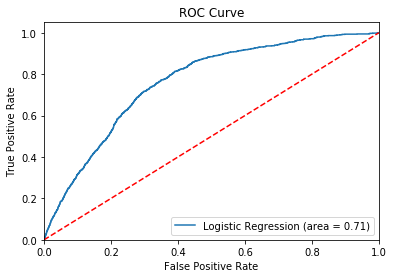

In [477]:
logit_roc_auc = roc_auc_score(yd_test, logreg.predict(Xd_test))
fpr, tpr, thresholds = roc_curve(yd_test, logreg.predict_proba(Xd_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

- Red Diagonal Like shows where the True Positive Rate = False Positive Rate 
- Since the ROC Curve is to the left of the red like, we know that the propoartion of correctly classified samples that were true positive is the greater than the proportion of the samples that were incorrectly classified as false positives. 

### Random Forest

In [174]:
import subprocess
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.externals.six import StringIO
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier


In [478]:
brf = BalancedRandomForestClassifier(max_depth=40,n_estimators=100, random_state=0)


In [479]:
brf.fit(Xd_train, yd_train)


BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=40,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=1, oob_score=False, random_state=0,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [480]:
y_pred_r = brf.predict(Xd_test)
balanced_accuracy_score(yd_test, y_pred_r)

0.7298249033212882

Random Forest/Test RMSE: 0.5626371433867408   0.5658970261420837
Random Forest/Test RMSE: 0.5613693619031792   0.5641955027932757
Random Forest/Test RMSE: 0.5632699640809872   0.5659779234694177
Random Forest/Test RMSE: 0.5618330193708271   0.5644388915968289
Random Forest/Test RMSE: 0.5603438797824959   0.5633326550562475


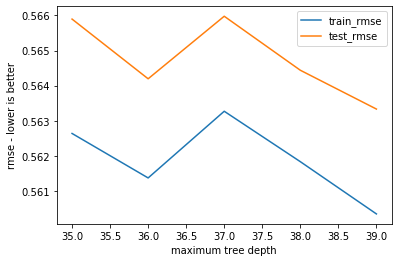

In [520]:
depths = range(35,40)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = BalancedRandomForestClassifier(max_depth=depth, random_state=10)
    decision_tree.fit(Xd_train,yd_train)
    curr_train_rmse = np.sqrt(mean_squared_error(yd_train,decision_tree.predict(Xd_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(yd_test,decision_tree.predict(Xd_test)))
    print('Random Forest/Test RMSE:',curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
    
sns.mpl.pyplot.plot(depths, train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel('maximum tree depth')
sns.mpl.pyplot.ylabel('rmse - lower is better')
sns.mpl.pyplot.legend()

In [482]:
Counter(y_pred_r)

Counter({0: 58707, 1: 28662})

In [591]:
print(classification_report(yd_test, y_pred_r))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     86367
           1       0.03      0.78      0.05      1002

    accuracy                           0.68     87369
   macro avg       0.51      0.73      0.43     87369
weighted avg       0.99      0.68      0.80     87369



In [605]:
importance = pd.DataFrame({'Feature':features1, 'importance':brf.feature_importances_}).sort_values("importance", ascending=False)


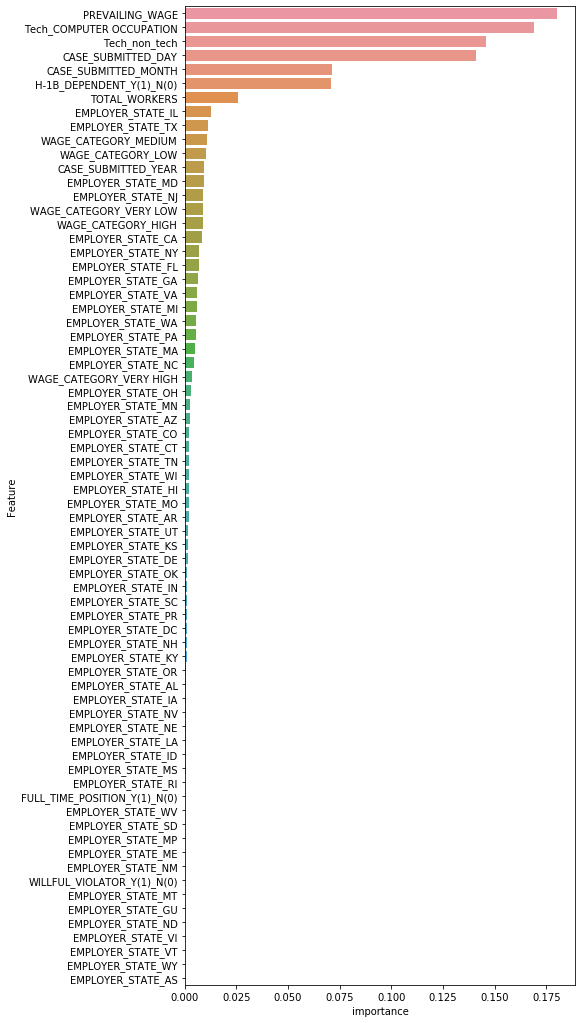

In [623]:
plt.figure(figsize=(7, 18))
sns.barplot(y="Feature", x="importance", data=importance)
plt.show();

### Decision Tree

In [89]:
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [90]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
import pydotplus

### balance data

In [523]:
X_smoted1, y_smoted1 = SMOTE(random_state=42).fit_sample(Xd_train,yd_train)

In [532]:
dt_model = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
dt_model.fit(X_smoted1, y_smoted1)
y_prediction = dt_model.predict(Xd_test)

In [533]:
print(classification_report(yd_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     86367
           1       0.03      0.71      0.05      1002

    accuracy                           0.70     87369
   macro avg       0.51      0.70      0.44     87369
weighted avg       0.98      0.70      0.81     87369



In [534]:
print(metrics.confusion_matrix(yd_test,y_prediction))


[[60351 26016]
 [  294   708]]


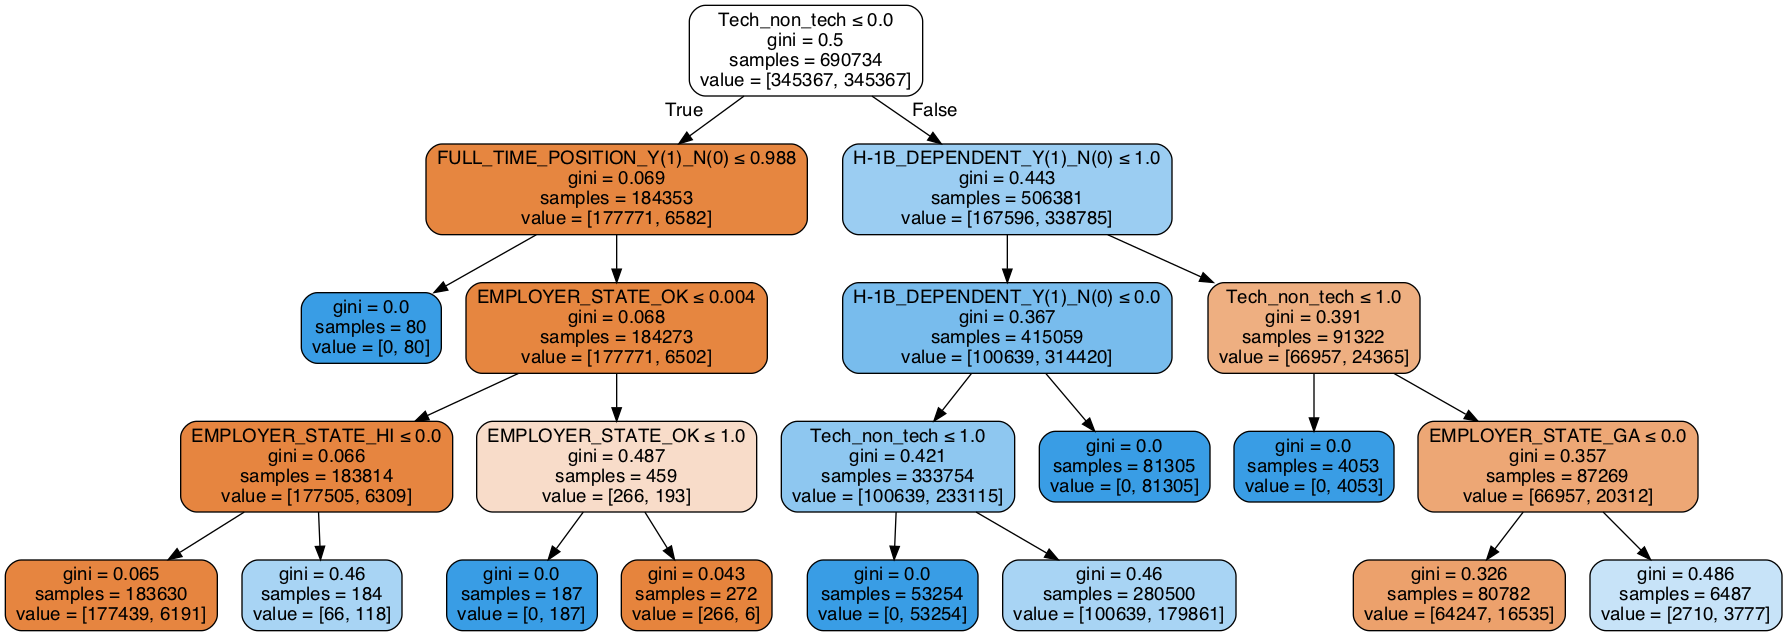

In [535]:
dot_data = StringIO()  
export_graphviz(dt_model, out_file=dot_data,  
                    feature_names=Xd_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Decision Tree Train/Test RMSE: 0.10841944022947345   0.10709154355996926
Decision Tree Train/Test RMSE: 0.10839304474759001   0.10709154355996926
Decision Tree Train/Test RMSE: 0.1082873984800438   0.10709154355996926
Decision Tree Train/Test RMSE: 0.10820809609043978   0.1070380913262625
Decision Tree Train/Test RMSE: 0.10819487337442653   0.10698461238646345
Decision Tree Train/Test RMSE: 0.10815519552697975   0.10698461238646345
Decision Tree Train/Test RMSE: 0.10804931670030107   0.10698461238646345
Decision Tree Train/Test RMSE: 0.10787704197036742   0.1070380913262625
Decision Tree Train/Test RMSE: 0.1077708898738391   0.10698461238646345
Decision Tree Train/Test RMSE: 0.10745180437743881   0.10730508623176593
Decision Tree Train/Test RMSE: 0.10715847467071803   0.10783709289517007
Decision Tree Train/Test RMSE: 0.10673037418394954   0.10751820478577871
Decision Tree Train/Test RMSE: 0.10608498429552757   0.1079431795837815


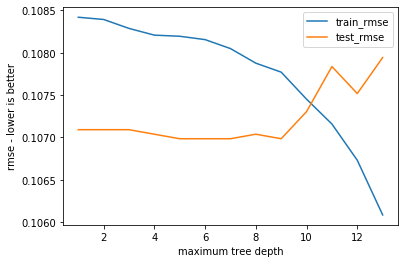

In [528]:
depths = range(1,14)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=10)
    decision_tree.fit(Xd_train,yd_train)
    curr_train_rmse = np.sqrt(mean_squared_error(yd_train,decision_tree.predict(Xd_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(yd_test,decision_tree.predict(Xd_test)))
    print('Decision Tree Train/Test RMSE:',curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
    
sns.mpl.pyplot.plot(depths, train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel('maximum tree depth')
sns.mpl.pyplot.ylabel('rmse - lower is better')
sns.mpl.pyplot.legend()

### Logistic Regression

In [511]:
from sklearn.utils import resample

In [509]:
X = pd.concat([Xd_train,yd_train],axis=1)
accepted = X[X.CASE_STATUS==0]
denied = X[X.CASE_STATUS==1]

In [514]:
# upsample minority
denied_upsampled = resample(denied,
                          replace=True, # sample with replacement
                          n_samples=len(accepted), # match number in majority class
                          random_state=27) # reproducible results

In [515]:
upsampled = pd.concat([accepted, denied_upsampled])

In [516]:
y2_train = upsampled.CASE_STATUS
X2_train = upsampled.drop('CASE_STATUS', axis=1)

In [517]:
upsampled = LogisticRegression(solver='liblinear').fit(X2_train, y2_train)


In [518]:
upsampled_pred = upsampled.predict(Xd_test)

In [519]:
print(classification_report(yd_test, upsampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79     86367
           1       0.03      0.76      0.05      1002

    accuracy                           0.66     87369
   macro avg       0.51      0.71      0.42     87369
weighted avg       0.98      0.66      0.79     87369



### XGBoost

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [113]:
model = XGBClassifier()

In [114]:
model.fit(Xd_train, yd_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [115]:
y_predi = model.predict(Xd_test)

In [116]:
print(classification_report(yd_test, y_predi))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     86332
           1       0.00      0.00      0.00      1037

    accuracy                           0.99     87369
   macro avg       0.49      0.50      0.50     87369
weighted avg       0.98      0.99      0.98     87369



/anaconda3/envs/Metis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

